## Index
* [Instalar librerías](#install-libraries)
    * [Non-blind deconvolution](#non-blind-deconvolution)
        * [Wiener Filter](#wiener)
        * [Lucy-Richardson](#Lucy-Richardson)
        * [Modified unsupervised Wiener](#uns-wiener)
        * [Lucy-Richardson with TV prior](#Lucy-Richardson-TV)
    * [Blind deconvolution](#bind-deconvolution)
    * [Semi-blind deconvolution](#semi-bind-deconvolution)

# Instalar librerías <a class="anchor" id="install-libraries"></a>

Primero activar el entorno virtual e instalar el siguiente paquete si se usa VSCode:
```bash
python3 -m pip install ipykernel -U --force-reinstall
```

**Instalar [numpy](https://numpy.org/install/):**
```bash
pip install numpy matplotlib scipy scikit-image

In [1]:
# Librerías requeridas
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.signal import deconvolve
from skimage import color, data, restoration, img_as_float, io

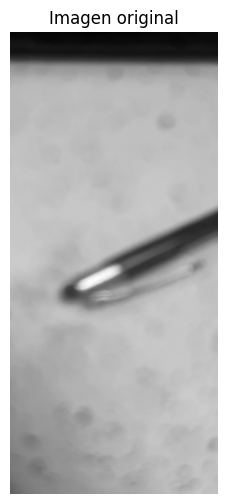

In [2]:
# Imagen degradada
image = io.imread("../../assets/7.jpg")

if image.ndim == 3:
    image = color.rgb2gray(image)

image = img_as_float(image)

plt.figure(figsize=(6, 6))
plt.title("Imagen original")
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

# Non-blind deconvolution 

[[7.83993366e-15 4.38797349e-14 2.19766080e-13 ... 2.19766080e-13
  4.38797349e-14 7.83993366e-15]
 [4.38797349e-14 2.45592785e-13 1.23002027e-12 ... 1.23002027e-12
  2.45592785e-13 4.38797349e-14]
 [2.19766080e-13 1.23002027e-12 6.16040031e-12 ... 6.16040031e-12
  1.23002027e-12 2.19766080e-13]
 ...
 [2.19766080e-13 1.23002027e-12 6.16040031e-12 ... 6.16040031e-12
  1.23002027e-12 2.19766080e-13]
 [4.38797349e-14 2.45592785e-13 1.23002027e-12 ... 1.23002027e-12
  2.45592785e-13 4.38797349e-14]
 [7.83993366e-15 4.38797349e-14 2.19766080e-13 ... 2.19766080e-13
  4.38797349e-14 7.83993366e-15]]


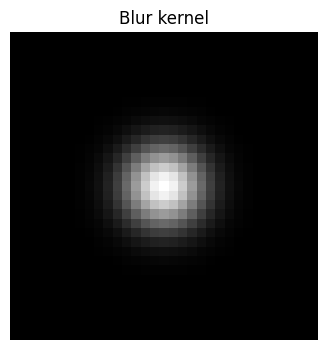

In [4]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / kernel.sum()

kernel = gaussian_kernel(size=33, sigma=3)
print(kernel)
plt.figure(figsize=(4, 4))
plt.title("Blur kernel")
plt.imshow(kernel, cmap="gray")
plt.axis("off")
plt.show()

## Wiener Filter 

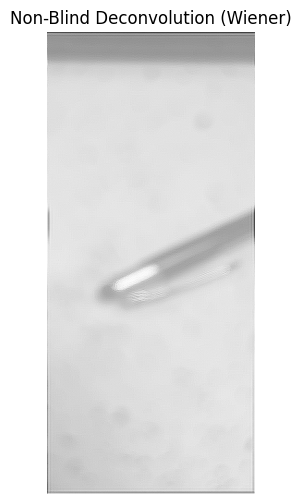

In [37]:
#...

## Modified unsupervised Wiener 

In [ ]:
deconvolved_wiener = restoration.unsupervised_wiener(image, kernel)[0]

plt.figure(figsize=(6, 6))
plt.title("Non-Blind Deconvolution (Wiener)")
plt.imshow(deconvolved_wiener, cmap="gray")
plt.axis("off")
plt.show()

## Lucy-Richardson

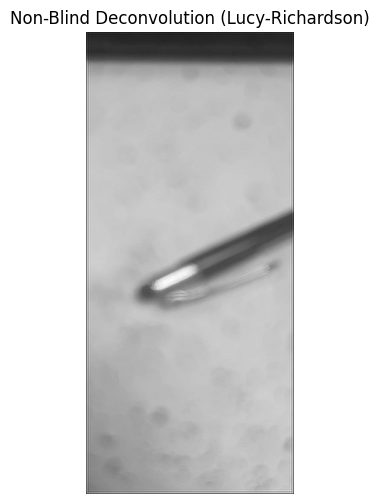

In [38]:
deconvolved_lr = restoration.richardson_lucy(image, kernel, num_iter=30)

plt.figure(figsize=(6, 6))
plt.title("Non-Blind Deconvolution (Lucy-Richardson)")
plt.imshow(deconvolved_lr, cmap="gray")
plt.axis("off")
plt.show()

## Lucy-Richardson with TV prior

# Blind deconvolution

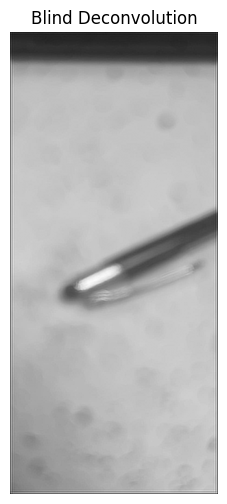

In [46]:
# Basic iterative approach:

rl_iterations = 30
iterations = 3

def estimate_psf_and_deconvolve(image, psf, rl_iterations, iterations):
    deconvolved = image
    for i in range(iterations):
        deconvolved = restoration.richardson_lucy(image, psf, num_iter=rl_iterations)
    return deconvolved

blind_deconvolved = estimate_psf_and_deconvolve(image, kernel, rl_iterations, iterations)

plt.figure(figsize=(6, 6))
plt.title("Blind Deconvolution")
plt.imshow(blind_deconvolved, cmap="gray")
plt.axis("off")
plt.show()


# Semi-blind deconvolution